In [139]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc



In [141]:
# loading the final data set we saved in the previous notebook 
df_final = pd.read_csv('final_dataset.csv')
df_final.head()

,oldpeak,thalch,ca,age,chol,trestbps,thal_reversable defect,exang_True,cp_atypical angina,sex_Male,thal_normal,cp_non-anginal,target
0,1.069475,0.029124,-0.718306,0.940446,-0.262867,0.749760,0,0,0,1,0,0,0
1,0.380309,-1.790447,2.487269,1.384143,0.747722,1.596354,0,1,0,1,1,0,1
2,1.327912,-0.880662,1.418744,1.384143,-0.339138,-0.661231,1,1,0,1,0,0,1
3,2.103224,1.632079,-0.718306,-1.943588,0.061285,-0.096835,0,0,0,1,1,1,0
4,0.294163,0.982232,-0.718306,-1.499891,-0.815830,-0.096835,0,0,1,0,1,0,0


# Supervised Classification Models

In [144]:
#  first we will separate the features (X) and the target (y)
X = df_final.drop('target', axis=1)
y = df_final['target']

In [146]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state ensures reproducibility of the split

In [148]:
# printing the shapes of trainnig and testing to make sure that we split the data the right way
print("Training set shape (features):", X_train.shape) 
print("Testing set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (target):", y_test.shape)

Training set shape (features): (239, 12)
Testing set shape (features): (60, 12)
Training set shape (target): (239,)
Testing set shape (target): (60,)


* The training shape (239, 12) means we have 239 rows (80% of total data) and 12 columns (the  features selected for modeling).
* The testing shape (60, 12) means you have 60 rows (the remaining 20%) and 12 columns, which is the same number of features as the training set.
* The training target shape (239,) means you have 239 rows of target labels, corresponding to the training features.
* The testing target shape (60,) means you have 60 rows of target labels, corresponding to the testing features.

### Logistic Regression

In [152]:
# now we train using Logistic Regression 
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Decision Tree

In [155]:
# then we train using Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Random Forest

In [158]:
# and we also train using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Support Vector Machine (SVM)

In [161]:
# and finally we train using Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

### Evaluating models

In [164]:
# now we have to evaluate the models with Accuracy, Precision, Recall, F1-score

# first we have to Create a dictionary of the trained models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

In [166]:
# now we will do for loop to print every model's Accuracy, Precision, Recall, F1-score
# i will also use classification_report to preform every model's calssification report
for model_name, model in models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.88      0.84      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.78      0.84      0.81        25

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.88      0.84      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60

* the results shows that Logistic Regression (0.88)	have Excellent balance of precision (0.88) and recall (0.84) for heart disease cases.
* Random Forest	(0.88) Also shows excellent balance, identical to Logistic Regression's performance.
* SVM (0.87) have High precision (0.90) for predicting heart disease, but lower recall (0.76).
* Decision Tree	(0.83) The lowest performing model, with the lowest scores in all categories.



*  Both the Logistic Regression and Random Forest models are the top performers. we can choose one of them to move on to the next step

### ROC Curve & AUC Score

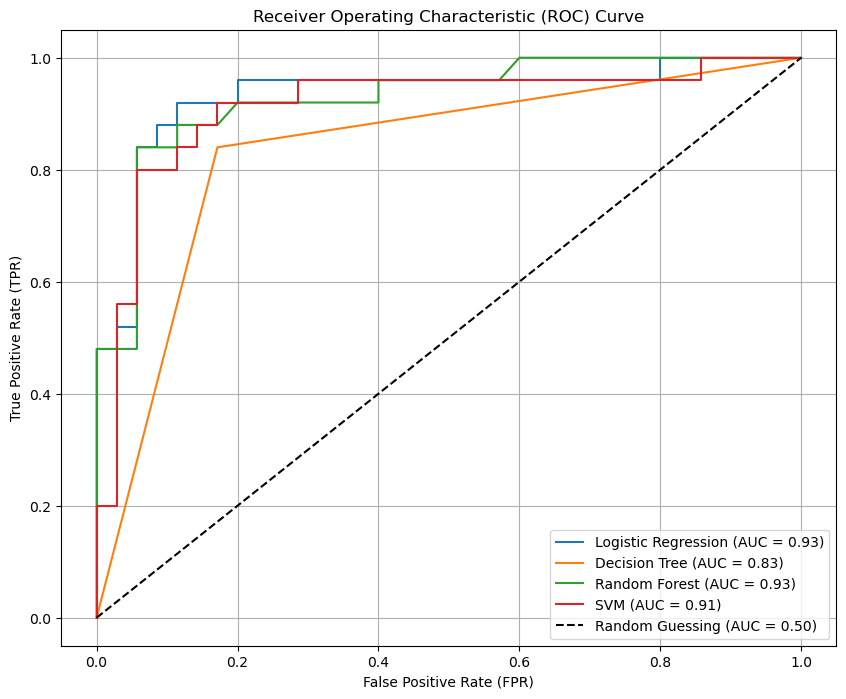

In [173]:
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Get probability scores for the ROC curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else: # For SVM with probability=True
        y_proba = model.decision_function(X_test)
    
    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)


 * As we see the result of ROC Curve & AUC Score we get that as previous metric analysis showed, Logistic Regression (AUC = 0.93) and Random Forest (AUC = 0.93) are your best-performing models. as their curves are closest to the top-left corner of the plot, which is the ideal position for a perfect model.